#Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [2]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [3]:
# Read data
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# Apply one-hot encoding to nominal variables
cols_nom = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder()

# Fit on training data
encoder.fit(train_df[cols_nom])

# Transform both training and test datasets
train_encoded = pd.DataFrame(encoder.transform(train_df[cols_nom]).toarray(),
                             columns=encoder.get_feature_names_out())
test_encoded = pd.DataFrame(encoder.transform(test_df[cols_nom]).toarray(),
                            columns=encoder.get_feature_names_out())

# Reset index and merge encoded columns back
train_encoded.reset_index(drop=True, inplace=True)
test_encoded.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.drop(columns=cols_nom, inplace=True)
test_df.drop(columns=cols_nom, inplace=True)

train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)


In [4]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,31,0,1,1463,23,3,2,0,64,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,933,9,4,3,0,94,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22,0,1,253,11,3,1,1,43,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23,0,1,373,1,2,4,0,47,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,1,528,8,4,3,0,100,3,1,...,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000
1,31,1,1463,23,3,2,0,64,2,2,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
2,41,1,933,9,4,3,0,94,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
3,22,1,253,11,3,1,1,43,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
4,23,1,373,1,2,4,0,47,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,36,2,493,10,2,1,0,42,3,1,...,0.000000,0.449785,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.449785,0.550215
2372,29,1,1250,21,3,1,0,38,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
2373,24,1,688,17,3,2,0,57,3,1,...,0.000000,0.000000,0.0,0.0,0.632241,0.367759,0.0,0.000000,0.632241,0.367759
2374,24,1,1252,11,1,4,1,74,3,1,...,0.585870,0.414130,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000


In [6]:
y_train_resampled.value_counts()

Attrition
0    1188
1    1188
Name: count, dtype: int64

In [7]:
# fitting Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG, display

CART = DecisionTreeClassifier()
CART.fit(X_train_resampled, y_train_resampled)

train_score = CART.score(X_train, y_train)
test_score = CART.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.998 and 0.827 over the testing data


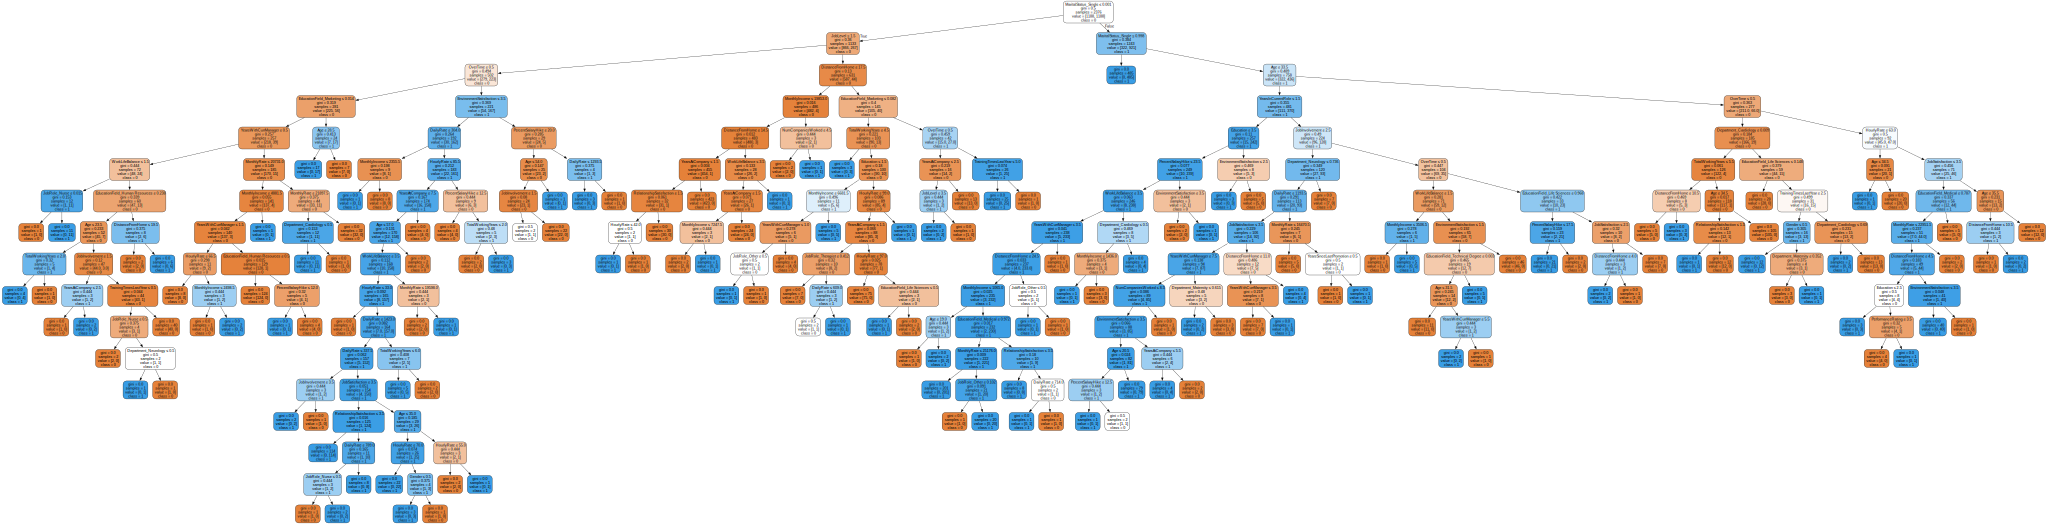

In [8]:
# Visualize the decision tree
dot_data = Source(export_graphviz(CART, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True))
display(SVG(dot_data.pipe(format='svg')))

In [9]:
# print out the most important features and their values
feature_importances = CART.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
41             MaritalStatus_Single    0.345497
0                               Age    0.109327
14                         OverTime    0.104203
9                          JobLevel    0.067301
5           EnvironmentSatisfaction    0.029154
3                  DistanceFromHome    0.028457
22               YearsInCurrentRole    0.027684
30         EducationField_Marketing    0.024917
7                        HourlyRate    0.022224
8                    JobInvolvement    0.021942
12                      MonthlyRate    0.019573
2                         DailyRate    0.018379
20                  WorkLifeBalance    0.018198
10                  JobSatisfaction    0.015086
24             YearsWithCurrManager    0.013335
29     EducationField_Life Sciences    0.012919
11                    MonthlyIncome    0.012290
21                   YearsAtCompany    0.011975
18                TotalWorkingYears    0.011467
15                PercentSalaryHike    0

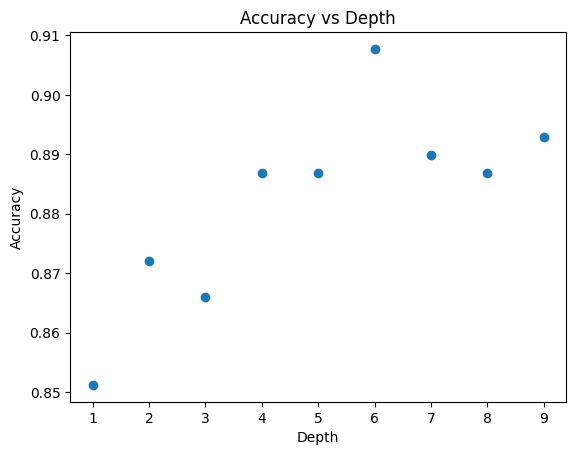

The best performing depth is: 6


In [10]:
depths = range(1, 10)
accuracy = pd.Series(index=depths, dtype=float)

for depth in depths:
  CART.set_params(max_depth=depth)
  CART.fit(X_train, y_train)
  accuracy[depth] = CART.score(X_test, y_test)

plt.scatter(accuracy.index, accuracy.values)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# The best performing depth
print(f"The best performing depth is: {accuracy.idxmax()}")

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 50)
}

# Perform Search
random_search = RandomizedSearchCV(
    estimator= CART,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=1,
    n_jobs=-1,
    return_train_score=True)

# Fit the model
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_dt = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best performance using decision tree is {best_score_dt:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=1, min_s

In [12]:
# Catboost works better without one-hot encoding
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

In [13]:
%pip install catboost

from catboost import CatBoostClassifier, Pool


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime', 'BusinessTravel']

cat_model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='Logloss', verbose=True)

cat_model.fit(X_train, 
              y_train,
              cat_features=categorical_features,
              verbose=True
              )


preds_class = cat_model.predict(X_test)
preds_proba = cat_model.predict_proba(y_test)

0:	learn: 0.3201537	total: 1.88ms	remaining: 186ms
1:	learn: 0.2578593	total: 4.18ms	remaining: 205ms
2:	learn: 0.2410384	total: 6.33ms	remaining: 205ms
3:	learn: 0.2270980	total: 7.46ms	remaining: 179ms
4:	learn: 0.2080941	total: 8.28ms	remaining: 157ms
5:	learn: 0.1873131	total: 9.18ms	remaining: 144ms
6:	learn: 0.1703477	total: 9.94ms	remaining: 132ms
7:	learn: 0.1604228	total: 11.3ms	remaining: 130ms
8:	learn: 0.1530673	total: 12.3ms	remaining: 124ms
9:	learn: 0.1492079	total: 13.2ms	remaining: 118ms
10:	learn: 0.1491936	total: 14ms	remaining: 113ms
11:	learn: 0.1441654	total: 14.8ms	remaining: 109ms
12:	learn: 0.1366099	total: 15.7ms	remaining: 105ms
13:	learn: 0.1314725	total: 16.6ms	remaining: 102ms
14:	learn: 0.1274664	total: 17.5ms	remaining: 98.9ms
15:	learn: 0.1254248	total: 18.3ms	remaining: 96.1ms
16:	learn: 0.1213460	total: 19.3ms	remaining: 94.2ms
17:	learn: 0.1186513	total: 20.2ms	remaining: 92ms
18:	learn: 0.1133842	total: 21ms	remaining: 89.6ms
19:	learn: 0.1075718	to

In [22]:
print(accuracy_score(y_test, preds_class))


0.9107142857142857


In [23]:
preds_class

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

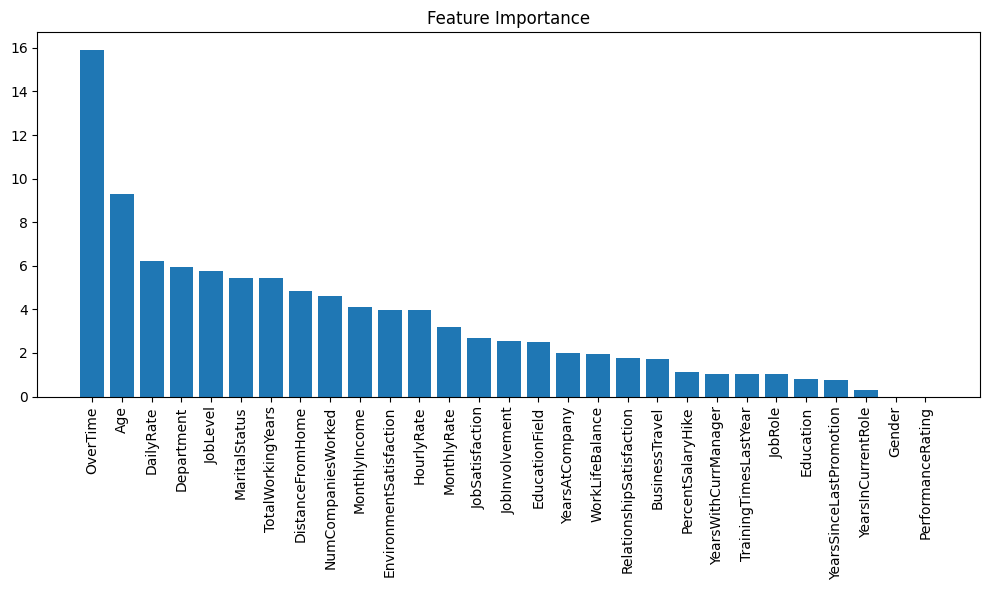

In [18]:
import numpy as np
# Get feature importances and names directly from X_train
importances = cat_model.get_feature_importance()
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.tight_layout()  # Ensures labels are visible
plt.show()

In [19]:
print("Classification Report:")
print(classification_report(y_test, preds_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       289
           1       0.76      0.53      0.62        47

    accuracy                           0.91       336
   macro avg       0.84      0.75      0.79       336
weighted avg       0.90      0.91      0.90       336



In [40]:
y_test.value_counts()

Attrition
0    289
1     47
Name: count, dtype: int64

In [34]:
289/(289+47)

0.8601190476190477